Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - classification_output_accuracy: 0.2801 - classification_output_loss: 3.8558 - loss: 76.5064 - regression_output_loss: 72.6506 - val_classification_output_accuracy: 0.8914 - val_classification_output_loss: 0.3767 - val_loss: 0.6285 - val_regression_output_loss: 0.2531
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - classification_output_accuracy: 0.7824 - classification_output_loss: 0.6926 - loss: 4.4416 - regression_output_loss: 3.7489 - val_classification_output_accuracy: 0.9147 - val_classification_output_loss: 0.3032 - val_loss: 1.0077 - val_regression_output_loss: 0.7045
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - classification_output_accuracy: 0.8432 - classification_output_loss: 0.5165 - loss: 4.5281 - regression_output_loss: 4.0116 - val_classification_output_accuracy: 0.9276 - val_classification_output_loss: 0.2595 - val_loss: 0.4791 - val_regression_output_loss: 0.2185
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━

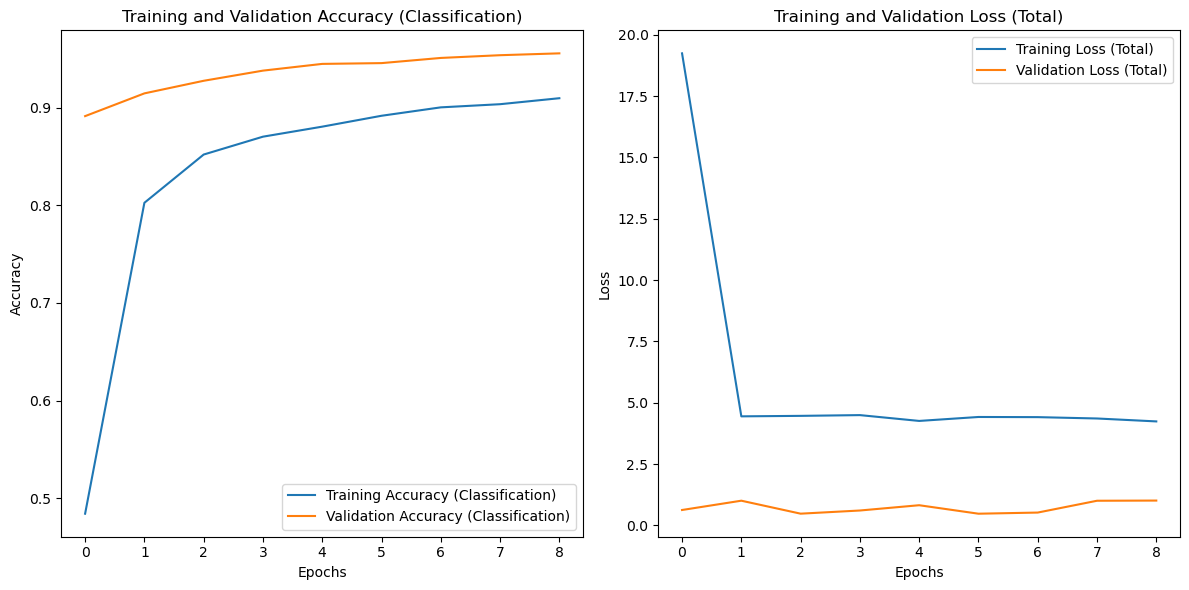

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train_class = tf.keras.utils.to_categorical(y_train, 10)
y_test_class = tf.keras.utils.to_categorical(y_test, 10)
y_train_reg = np.sum(x_train, axis=1)
y_test_reg = np.sum(x_test, axis=1)
input_layer = layers.Input(shape=(28*28,))

x = layers.Dense(512, activation='relu')(input_layer)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

classification_output = layers.Dense(10, activation='softmax', name='classification_output')(x)
regression_output = layers.Dense(1, activation='linear', name='regression_output')(x)
model = models.Model(inputs=input_layer, outputs=[classification_output, regression_output])
optimizer = Adam(clipvalue=1.0)
model.compile(
optimizer=optimizer,
loss={'classification_output': 'categorical_crossentropy', 'regression_output': 'mean_squared_error'},
loss_weights={'classification_output': 1.0, 'regression_output': 0.1},
metrics={'classification_output': 'accuracy'}
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
x_train, {'classification_output': y_train_class, 'regression_output': y_train_reg},
epochs=50,
batch_size=64,
validation_data=(x_test, {'classification_output': y_test_class, 'regression_output': y_test_reg}),
callbacks=[early_stopping]
)

test_results = model.evaluate(x_test, {'classification_output': y_test_class, 'regression_output': y_test_reg}, verbose=2)
test_loss = test_results[0]
test_classification_loss = test_results[1]
test_regression_loss = test_results[2]
test_acc = test_results[3]
print(f"Test accuracy: {test_acc}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_output_accuracy'], label='Training Accuracy (Classification)')
plt.plot(history.history['val_classification_output_accuracy'], label='Validation Accuracy (Classification)')
plt.title('Training and Validation Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss (Total)')
plt.plot(history.history['val_loss'], label='Validation Loss (Total)')
plt.title('Training and Validation Loss (Total)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()